In [1]:
#AI for sales and Advertising

#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
#setting the parameters
conversionrates = [0.05, 0.13, 0.09, 0.16, 0.11, 0.04, 0.20, 0.08, 0.01]
N = 10000
d = len(conversionrates)

X = np.zeros((N,d))
for i in range(N):
    for j in range(d):
        if np.random.random() <= conversionrates[j]:
            X[i][j] = 1
print(X)
sum(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


array([ 477., 1229.,  924., 1565., 1082.,  412., 2039.,  795.,   93.])

In [6]:
strategies_selected_rs = []
strategies_selected_ts = []

total_rewards_rs = 0
total_rewards_ts = 0

number_of_rewards_1 = d * [0]
number_of_rewards_0 = d * [0]

#random
for n in range(N):
    strategy_rs = random.randrange(d)
    strategies_selected_rs.append(strategy_rs)
    reward_rs = X[n, strategy_rs]
    total_rewards_rs = total_rewards_rs + reward_rs
  #thompson
    strategy_ts = 0
    max_random = 0
    for i in range(d):
        random_beta = random.betavariate(number_of_rewards_1[i] + 1 ,number_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            strategy_ts = i
    reward_ts = X[n,strategy_ts]
    if reward_ts == 1:
        number_of_rewards_1[strategy_ts] += 1
    else:
        number_of_rewards_0[strategy_ts] += 1
    strategies_selected_ts.append(strategy_ts)
    total_rewards_ts = total_rewards_ts + reward_ts
#computing realtive return
relative_return = (total_rewards_ts - total_rewards_rs) / total_rewards_rs * 100
print(relative_return)
total_rewards_rs  
total_rewards_ts

102.91363163371487


1950.0

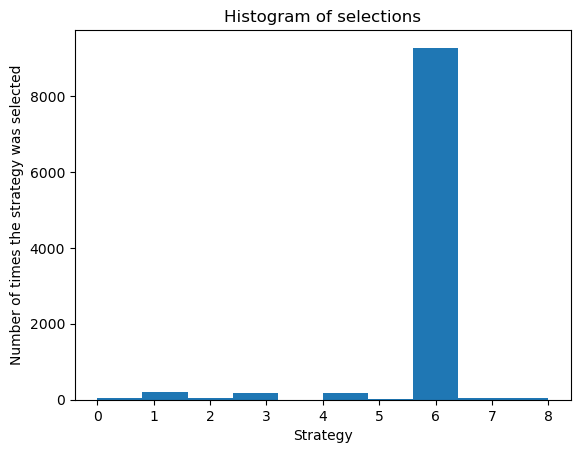

In [7]:
plt.hist(strategies_selected_ts)
plt.title("Histogram of selections")
plt.xlabel("Strategy")
plt.ylabel("Number of times the strategy was selected")
plt.show()